In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp
import time

import matplotlib.pyplot as plt
import os

In [2]:
import sys
sys.executable

'C:\\Users\\Dennis\\anaconda3\\envs\\rc_env_np16p6\\python.exe'

In [ ]:
# new imports:
from rescomp.alternative_tests import ks_simulation_tests
compare_ks_sims = ks_simulation_tests.compare_ks_sims

# Other simulation:

In [145]:
def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, 
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps, 
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point, 
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps, 
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32), 
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64), 
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4), 
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1), 
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2), 
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7), 
    }
    return ks_sim_dict

def create_starting_points_func(dimensions, N_ens, seed=100):
    np.random.seed(seed)
    starting_points = np.random.randn(N_ens, dimensions)
    return starting_points

In [ ]:
# (2019) Edson, Bunder et al.
LE_literature_dict = {12: [0.003, -0.005, -0.088, -0.089, -0.186, -3.524, -3.525, -9.835, -9.849, -9.959, -10.01, -10.12], 
                     13.5: [0.059, 0.004, -0.004, -0.227, -0.730, -1.467, -1.529, -6.956, -6.963, -7.977, -7.993, -9.199],
                     22: [0.043, 0.003, 0.002, -0.004, -0.008, -0.185, -0.253, -0.296, -0.309, -1.965, -1.967, -5.599], 
                     36: [0.080, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373], 
                     60: [0.089, 0.067, 0.055, 0.041, 0.030, 0.005, 0.003, 0.000, -0.004, -0.009, -0.029, -0.066],
                     100: [0.088, 0.082, 0.070, 0.061, 0.048, 0.041, 0.033, 0.028, 0.018, 0.012, 0.005, 0.003]}

### test

In [158]:
val = 0.1
"{:.1e}".format(val).replace(".", "p")

'1p0e-01'

In [151]:
d = {"a": [1,2,3], "b": [4,5,6]}

from itertools import product
def dict_product(inp):
    return (dict(zip(inp.keys(), values)) for values in product(*inp.values()))

for x in (dict(zip(d.keys(), values)) for values in product(*d.values())):
    print(x)
list(my_product(d))

{'a': 1, 'b': 4}
{'a': 1, 'b': 5}
{'a': 1, 'b': 6}
{'a': 2, 'b': 4}
{'a': 2, 'b': 5}
{'a': 2, 'b': 6}
{'a': 3, 'b': 4}
{'a': 3, 'b': 5}
{'a': 3, 'b': 6}


[{'a': 1, 'b': 4},
 {'a': 1, 'b': 5},
 {'a': 1, 'b': 6},
 {'a': 2, 'b': 4},
 {'a': 2, 'b': 5},
 {'a': 2, 'b': 6},
 {'a': 3, 'b': 4},
 {'a': 3, 'b': 5},
 {'a': 3, 'b': 6}]

## Plotting of files:

In [3]:
# load function:
import re
import yaml

from rescomp.alternative_tests import ks_simulation_tests as ks

{'system_size': 36, 'dimensions': 54, 'ks_sims': 'rkstiff', 'N_ens': 50, 'dt': 0.25, 'tau': 500, 'eps': 0.0001, 'T': 50, 'N_dims': 50}
shape of file: (201, 50, 50)


c:\users\dennis\documents\github\rescomp\rescomp\alternative_tests\ks_simulation_tests.py:382: RuntimeWarning: invalid value encountered in log
  data_error_low = np.log(data_error_low)


(-1, 10)

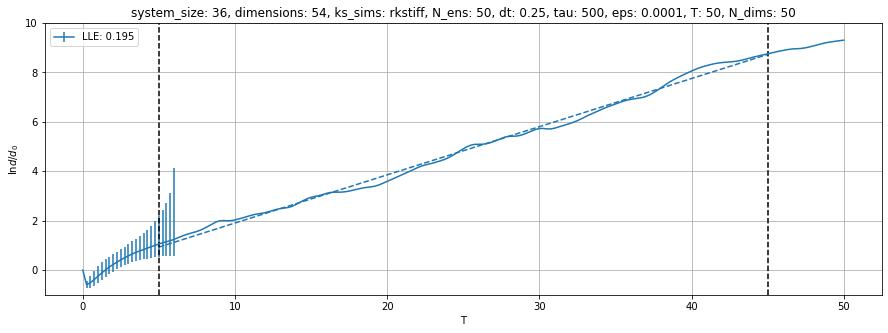

In [144]:
# plot single files: 

prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_nr1"

file_name = "div__L0_36__dim0_54__ks2_numpy__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # numpy
file_name = "div__L0_36__dim0_54__ks0_numpy32__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # numpy32
file_name = "div__L0_36__dim0_54__ks1_numpy64__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # numpy64
file_name = "div__L0_36__dim0_54__ks3_Bhatt__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # Bhatt
file_name = "div__L0_36__dim0_54__ks4_normal__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # normal
file_name = "div__L0_36__dim0_54__ks5_Pathak__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" # Pathak
file_name = "div__L0_36__dim0_54__ks6_rkstiff_e1__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" #rke1
file_name = "div__L0_36__dim0_54__ks7_rkstiff_e2__Nens0_50__dt0_0p25__tau0_500__eps0_1p0e-04__T0_50__Ndims0_50" #rke2


plt.figure(figsize=(15, 5))
ax = plt.gca()

include_fit = 1
mean_axs = "all"
show_error = 1

dim_index = None
ens_index = None

# dim_index = [1, 2, 3, 4, 5, 3]
# ens_index = 0

t_min = 5
t_max = 45

ks.plot_div_file(ax, file_name, prepath=prepath, exp_name=exp_name, mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# plt.xlim(0, 25)
ax.axvline(t_min, c="k", linestyle="--")
ax.axvline(t_max, c="k", linestyle="--")

plt.ylim(-1, 10)

# 17.01.2022: new "compare_ks_sims" function

In [ ]:
### PARAMETERS:

# funcs
create_ks_sim_dict_func = create_ks_sim_dict
create_starting_points_func = create_starting_points_func

# ks simulations to test:
ks_sims = ["normal", "Bhatt", "Pathak", "rkstiff_e1", "rkstiff_e2", "numpy", "numpy32", "numpy64"]


# parameter_dict
parameter_dict = {
    "system_size": [36],
    "dimensions": [54, 100, 500],
    "dt": [0.25],
    "tau": 500,
    "T": 50, 
    "eps": [1e-4],
    "N_dims": 50,
    "N_ens": 50,
}

# settings:
return_qr = False
T_qr = 2
return_traj = True
T_traj = 10
save = True
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_nr1"


out = compare_ks_sims(create_ks_sim_dict_func, create_starting_points_func, ks_sims,
                    parameter_dict, return_qr, T_qr, return_traj, T_traj,
                    save, prepath, exp_name)

In [ ]:
out[0]

In [ ]:
#### import yaml
from yaml import Loader, Dumper

def plot_sim_exp(exp_name="", prepath="", plot_div=True, plot_traj=False):
    transform_dict = {"L": "system_size", 
                      "dim": "dimensions", 
                      "ks": "ks_sims", 
                      "Nens": "N_ens", 
                      "dt": "dt", 
                      "tau": "tau", 
                      "eps": "eps", 
                      "T": "T", 
                      "Ndims": "N_dims", 
                      }
    
    
    path = os.path.join(prepath, exp_name)
    files = os.listdir(path)
    info_file_list = [x for x in files if x.startswith("info")]
    if len(info_file_list) == 0:
        raise Exception(f"info(..).yml file not found in {path}")
    info_file = info_file_list[0]
    info_path = os.path.join(path,info_file)
    # print(info_path)
    with open(info_path, 'r') as f:
        info_dict = yaml.load(f, Loader=yaml.Loader)
    print(info_dict)
    
    parameters_dict= info_dict["parameter_dict"]
    
    sim_parameters_dict = dict(parameters_dict, ks_sims = info_dict["ks_sims"])
    
    return sim_parameters_dict
    
    return_qr = info_dict["return_qr"]
    return_traj = info_dict["return_traj"]
    ,
    if plot_traj:
        if not return_traj:
            print("Error: Can not plot trajectory, since none was created.")
        else:
            traj_files = [x for x in files if x.startswith("traj__")]
            # TODO: plot traj_files
    
    if plot_div:
        div_files = [x for x in files if x.startswith("div__")]
        
        same_color_key = "ks_sims"
        same_color_dict = {}
        
#         same_style_key = "dt"
#         same_style_dict = {}
#         lines = ["-","--","-.",":"]
        coefs = []
        for div_file in div_files:
            params = div_file.split(".")[0].split("__")[1:]
            params = [x.split("_")[0] for x in params]
            params = [(transform_dict[re.search("\D+", string).group()], int(re.search("\d+", string).group())) for string in params]
            params = [(x, sim_parameters_dict[x][y]) for (x, y) in params]
            params = dict(params)
            
            
            array = np.load(os.path.join(path, div_file))
            
            dt = params["dt"]
            T = params["T"]
            eps = params["eps"]
            ks_sims = params["ks_sims"]
            dimensions = params["dimensions"]
            
            if False:
                pass
            elif not dt == 0.05: # 0.05 0.1 0.25
                continue
            elif not dimensions == 100: # 54 100 500
                continue
            elif not eps == 1e-1: # 0.1 1e-4 1e-6
                continue
#             elif not ks_sims == "Bhatt":
#                 continue

            ts = np.arange(0, T + dt, step=dt)
            data = np.mean(array, axis=(-1, -2))/eps
            log_dist = np.log(data)
            
            t_min = 5
            t_max = 40# 80
            i_min, i_max = int(t_min/dt), int(t_max/dt)
            y = log_dist[i_min: i_max+1]
            x = np.arange(i_min, i_max+1)*dt
            coef = np.polyfit(x,y,1)
            poly1d_fn = np.poly1d(coef)
            coefs.append(coef[0])
            
            print(coef[0])
            label = f"{ks_sims}_LE_{coef[0].round(3)}" 
            
            p = plt.plot(ts, np.log(np.mean(array, axis=-1)/eps), label=label)
            c = p[0].get_color()
            title = [f"{x}: {y}" for (x, y) in params.items() if not x == "ks_sims"]
            plt.plot(x, poly1d_fn(x), linestyle="--", c=c)
            
            
#             same_color_val = params[same_color_key]

#             if same_color_val in same_color_dict.keys():
#                 c = same_color_dict[same_color_val]
#                 p = plt.plot(ts, np.log(np.mean(array, axis=-1)/eps), label=ks_sims, c=c)
#             else:
#                 p = plt.plot(ts, np.log(np.mean(array, axis=-1)/eps), label=ks_sims)
            
#                 c = p[0].get_color()
#                 if not same_color_val in same_color_dict.keys():
#                     same_color_dict[same_color_val] = c


    coefs = np.array(coefs)
    LE_str = f"LLE {np.mean(coefs).round(3)} +- {np.std(coefs).round(3)}"
    plt.title(str(title) + " " + LE_str)

    print(LE_str)
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_nr1"

plt.figure(figsize=(15,10))
out = plot_sim_exp(exp_name=exp_name, prepath=prepath)
plt.grid()
# plt.xlim(-1, 5)
plt.legend()

In [ ]:
import re
import yaml
from yaml import Loader, Dumper

def get_sim_data(exp_name="", prepath=""):
    
    transform_dict = {"L": "system_size", 
                      "dim": "dimensions", 
                      "ks": "ks_sims", 
                      "Nens": "N_ens", 
                      "dt": "dt", 
                      "tau": "tau", 
                      "eps": "eps", 
                      "T": "T", 
                      "Ndims": "N_dims", 
                      }
    
    
    path = os.path.join(prepath, exp_name)
    files = os.listdir(path)
    info_file_list = [x for x in files if x.startswith("info")]
    if len(info_file_list) == 0:
        raise Exception(f"info(..).yml file not found in {path}")
    info_file = info_file_list[0]
    info_path = os.path.join(path,info_file)
    with open(info_path, 'r') as f:
        info_dict = yaml.load(f, Loader=yaml.Loader)
    print(info_dict)
    parameters_dict= info_dict["parameter_dict"]
    sim_parameters_dict = dict(parameters_dict, ks_sims = info_dict["ks_sims"])

    print(sim_parameters_dict)

    div_files = [x for x in files if x.startswith("div__")]

    coefs = []
    data = []
    for div_file in div_files:
        params = div_file.split(".")[0].split("__")[1:]
        params = [x.split("_")[0] for x in params]
        params = [(transform_dict[re.search("\D+", string).group()], int(re.search("\d+", string).group())) for string in params]
        params = [(x, sim_parameters_dict[x][y]) for (x, y) in params]
        params = dict(params)

        array = np.load(os.path.join(path, div_file))
        
        data.append((params, array))
        
    return sim_parameters_dict, info_dict, data

prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t4"

params_dict, info_dict ,data = get_sim_data(exp_name=exp_name, prepath=prepath)

In [ ]:
# load function:
from rescomp.alternative_tests import ks_simulation_tests
subplot_creator = ks_simulation_tests.subplot_creator

In [101]:
def match_params(x, all_params_key):
    x_filtered = {key: val for (key, val) in x.items() if key in all_params_key.keys()}
    return x_filtered == all_params_key

def plot_func(ax, data, all_params_key, label=""):
    
    data_list = [(x, y) for (x, y) in data if match_params(x, all_params_key)]
    params = data_list[0][0]
    array = data_list[0][1]

    dt = params["dt"]
    T = params["T"]
    eps = params["eps"]
    
    ts = np.arange(0, T + dt, step=dt)
    dist = np.mean(array, axis=(-1, -2))/eps
    log_dist = np.log(dist)
    
    t_min = 5
    t_max = 40 
    i_min, i_max = int(t_min/dt), int(t_max/dt)
    y = log_dist[i_min: i_max+1]
    x = np.arange(i_min, i_max+1)*dt
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)
    label = label + f", LLE : {coef[0].round(3)}"
    p = ax.plot(ts, log_dist, label=label)
    c = p[0].get_color()
    ax.plot(x, poly1d_fn(x), linestyle="--", c=c)
    
    ax.set_xlabel("T")
    ax.set_ylabel(r"$\ln d/d_0$")
    ax.legend()
    ax.grid(True)
    
zs = "ks_sims"
xs =["dimensions", "eps"]
ys = "dt"

subplot_creator(params_dict = params_dict, data=data, plot_func=plot_func, zs=zs, xs=xs, ys=ys)

NameError: name 'subplot_creator' is not defined

In [ ]:
d1 = {1: 2}
d2 = {4:6}

{**d1, **d2}

In [ ]:
from itertools import product

arg_list = [[1,2],[1,2]]
product(*arg_list)
for items in product(*arg_list):
    print(" ".join(str(item) for item in items))

In [ ]:
string = "dt10"

import re

out = re.search("\d+", string).group()
print(out.group())

In [ ]:
name = "div__L0_36__dim2_500__ks6_rkstiff_e1__Nens0_3__dt0_0p05__tau0_100__eps0_1p0e-01__T0_50__Ndims0_1"
div = out[1][name]
div.shape
plt.plot((np.log(div[:, 0, 1])))

In [ ]:
print(list(out[3].values())[0].shape)
print(list(out[3].values())[3])
t = list(out[2].values())[0][0, :, :]
plt.imshow(t.T)

### 1. Check the trajectories for different KS simulations:

In [ ]:
dt = 0.01
system_size = 36 # 12, 13.5, 22, 36, 60, 100
ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

T = 100
time_steps = int(T/dt)
KS_sims = ["normal", "Bhatt", "Pathak", "rkstiff_e1", "numpy", "numpy32", "numpy64", "normal", "normal_M1", "normal_M2"]
np.random.seed(1)
starting_point = np.random.randn(dimensions)

ks_sim_dict = create_ks_sim_dict(dimensions, system_size)

In [ ]:
results_traj = {}
for key in KS_sims:
    print(key, end=" ")
    data_creation_function = ks_sim_dict[key]
    t = time.time()
    results = data_creation_function(time_steps, dt, starting_point=starting_point)
    deltat = time.time() - t
    print(round(deltat, 3))
    results_traj[key] = results

In [ ]:
# PLOTTING
fig, axs = plt.subplots(len(results_traj), 1, figsize=(15,4*len(results_traj)), sharex=True)
plt.suptitle(f"KS sim trajectories, PARAMS: dim={dimensions}, L={system_size}, dt={dt}, T={T}"
             , y = 0.91)
i = 0
for key, res in results_traj.items():
    try:
        ax = axs[i]
    except:
        ax = axs
    ax.set_title(key)
    ax.imshow(res.T, aspect="auto")
    
    i+=1
ax.set_xlabel("time_steps")

### sweep, dt, tau, eps:

In [ ]:
# sweep
epss = [1e-4]
taus = [50, ]
dts = [0.05, 0.1, 0.25, 0.5]
KS_sims = ["normal", "Bhatt", "Pathak", "rkstiff_e1", "numpy", "numpy32", "numpy64"]


# PARAMETERS
T = 30
system_size = 36 # 12, 13.5, 22, 36, 60, 100
ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

N_ens = 3
np.random.seed(500)
starting_points = np.random.randn(N_ens, dimensions)

# simple algo:
N_dims = 3

ks_sim_dict = create_ks_sim_dict(dimensions, system_size)
# LITERATURE VALUES:
# lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
for i_key, key in enumerate(KS_sims):
    print(key)
    data_creation_function = ks_sim_dict[key]
    for i_tau, tau in enumerate(taus):
        for i_eps, eps in    enumerate(epss):
            for i_dt, dt in enumerate(dts):
                def f(x):
                    return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]
                out = rescomp.measures.largest_LE_simple(f, starting_points=starting_points, T=T, 
                                         tau=tau, dt=dt, eps=eps, N_dims=N_dims, agg=None)
                name = f"KS2_{key}_ieps_{i_eps}_itau_{i_tau}_idt_{i_dt}"
                np.save(name, out)

In [ ]:
# plott all:
i_tau = 0
i_key = 3

tau = taus[i_tau]
key = KS_sims[i_key]

t_min_ax = 0
t_max_ax = T

fig, axs = plt.subplots(nrows=len(epss), ncols=len(dts), figsize=(30,30))

fig.suptitle(f"{key}, tau={tau}", y = 0.91)
show_error = True
rel = True

for i_eps, eps in enumerate(epss):
    for i_dt, dt in enumerate(dts):
            
        # ax = axs[i_eps, i_dt]
        ax = axs[i_dt]

        
        file_name = f"KS2_{key}_ieps_{i_eps}_itau_{i_tau}_idt_{i_dt}.npy"
        out = np.load(file_name)
        
        # Data:
        if rel:
            out_new = out/eps
        # avg:
        mean = np.mean(out_new, axis=(-1, -2))
        std = np.std(out_new, axis=(-1, -2))
        log_dist = np.log(mean)
        y_error_high = np.log(mean + std)
        y_err = (y_error_high - log_dist)
        # y_error_low = np.log(mean - std)
        Ts = dt*np.arange(len(out))


        # FIT:
        t_min = 0
        t_max = 40# 80
        i_min, i_max = int(t_min/dt), int(t_max/dt)
        y = log_dist[i_min: i_max+1]
        x = np.arange(i_min, i_max+1)*dt
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef)


        # Purposely wrong fit:
        sloap = (log_dist[i_max] - log_dist[i_min])/(t_max - t_min)
        intercept = log_dist[0]
        poly1d_fn_qr = np.poly1d((sloap, intercept))


        # Plotting: 
        ax.set_title(f"KS={key}, N_ens={N_ens}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}")
        if show_error:
            ax.errorbar(Ts, log_dist, yerr = y_err, label=r"$\ln(d)=ln(d_0) + \lambda t$", ecolor="orange")
        else:
            ax.plot(Ts, log_dist, label=r"$\ln(d)=ln(d_0) + \lambda t$")
        ax.plot(x, poly1d_fn(x), '--k', label=f"linear fit: {coef[0].round(5)}")
        ax.plot(x, poly1d_fn_qr(x), "--r", label=f"first-last: {sloap.round(5)}")
        ax.set_xlim(t_min_ax, t_max_ax)
        plt.ylim(-2, 16)
        ax.grid()
        ax.legend()

# Check divergence trajectories:


In [ ]:
# sweep
epss = [1e-2, 1e-4, 1e-6, 1e-8]
taus = [100, 5000]
dts = [0.1, 0.25, 0.5]
KS_sims = ["Bhatt", "numpy", "numpy32", "numpy64"]

# PARAMETERS
T = 125
system_size = 36 # 12, 13.5, 22, 36, 60, 100
ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

N_ens = 20
np.random.seed(500)
starting_points = np.random.randn(N_ens, dimensions)

# simple algo:
N_dims = 5

# LITERATURE VALUES:
lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
# plott all:
i_tau = 0
i_key = 3

tau = taus[i_tau]
key = KS_sims[i_key]

t_min_ax = 0
t_max_ax = T

fig, axs = plt.subplots(nrows=len(epss), ncols=len(dts), figsize=(30,30))

fig.suptitle(f"{key}, tau={tau}", y = 0.91)
show_error = True
rel = True

for i_eps, eps in enumerate(epss):
    for i_dt, dt in enumerate(dts):
        ax = axs[i_eps, i_dt]
        
        file_name = f"KS1_{key}_ieps_{i_eps}_itau_{i_tau}_idt_{i_dt}.npy"
        out = np.load(file_name)
        


        # Data:
        if rel:
            out_new = out/eps
        # avg:
        mean = np.mean(out_new, axis=(-1, -2))
        std = np.std(out_new, axis=(-1, -2))
        log_dist = np.log(mean)
        y_error_high = np.log(mean + std)
        y_err = (y_error_high - log_dist)
        # y_error_low = np.log(mean - std)
        Ts = dt*np.arange(len(out))


        # FIT:
        t_min = 0
        t_max = 40# 80
        i_min, i_max = int(t_min/dt), int(t_max/dt)
        y = log_dist[i_min: i_max+1]
        x = np.arange(i_min, i_max+1)*dt
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef)


        # Purposely wrong fit:
        sloap = (log_dist[i_max] - log_dist[i_min])/(t_max - t_min)
        intercept = log_dist[0]
        poly1d_fn_qr = np.poly1d((sloap, intercept))


        # Plotting: 
        ax.set_title(f"KS={key}, N_ens={N_ens}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}")
        if show_error:
            ax.errorbar(Ts, log_dist, yerr = y_err, label=r"$\ln(d)=ln(d_0) + \lambda t$", ecolor="orange")
        else:
            ax.plot(Ts, log_dist, label=r"$\ln(d)=ln(d_0) + \lambda t$")
        ax.plot(x, poly1d_fn(x), '--k', label=f"linear fit: {coef[0].round(5)}")
        ax.plot(x, poly1d_fn_qr(x), "--r", label=f"first-last: {sloap.round(5)}")
        ax.set_xlim(t_min_ax, t_max_ax)
        plt.ylim(-2, 16)
        ax.grid()
        ax.legend()

In [ ]:
i_eps = 2
i_tau = 1
i_dt = 1
i_key = 2

eps = epss[i_eps]
tau = taus[i_tau]
dt = dts[i_dt]
key = KS_sims[i_key]

print("Parameters: ", )
print(key, tau, eps, dt)
# files = [x for x in os.listdir() if x.endswith(".npy")]
# print(files)

file_name = f"KS1_{key}_ieps_{i_eps}_itau_{i_tau}_idt_{i_dt}.npy"
out = np.load(file_name)
out.shape

In [ ]:
show_error = True
rel = True

t_min_ax = 0
t_max_ax = 30

# Data:
if rel:
    out_new = out/eps
    label = r"$\ln(d/d_0) = \lambda t$"
else:
    label = r"$\ln(d)=ln(d_0) + \lambda t$"
# avg:
mean = np.mean(out_new, axis=(-1, -2))
std = np.std(out_new, axis=(-1, -2))
log_dist = np.log(mean)
y_error_high = np.log(mean + std)
y_err = (y_error_high - log_dist)
# y_error_low = np.log(mean - std)
Ts = dt*np.arange(len(out))


# FIT:
t_min = 0
t_max = 2# 80
i_min, i_max = int(t_min/dt), int(t_max/dt)
y = log_dist[i_min: i_max+1]
x = np.arange(i_min, i_max+1)*dt
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)


# Purposely wrong fit:
sloap = (log_dist[i_max] - log_dist[i_min])/(t_max - t_min)
intercept = log_dist[0]
poly1d_fn_qr = np.poly1d((sloap, intercept))


# Plotting: 
plt.figure(figsize=(15,10))
plt.title(f"KS={key}, N_ens={N_ens}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}")
if show_error:
    plt.errorbar(Ts, log_dist, yerr = y_err, label=label, ecolor="orange")
else:
    plt.plot(Ts, log_dist, label=r"$\ln(d)=ln(d_0) + \lambda t$")
plt.plot(x, poly1d_fn(x), '--k', label=f"linear fit: {coef[0].round(5)}")
plt.plot(x, poly1d_fn_qr(x), "--r", label=f"first-last: {sloap.round(5)}")
plt.xlim(t_min_ax, t_max_ax)
# plt.ylim(-2, 10)
plt.grid()
plt.legend()

## old:

### 2. Check development trajectories for one Parameter set: 

In [ ]:
np.random.seed(1)

# PARAMETERS
dt = 0.25
N = 100
tau = 100
T = 2
eps = 1e-6
m = 5
system_size = 36 # 12, 13.5, 22, 36, 60, 100

ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

# dimensions = 39
N_ens = 3

KS_sims = ["normal", "Bhatt", "scipy", "scipy32", "scipy64", "numpy", "numpy32", "numpy64"]
# KS_sims = ["normal", "Bhatt", "scipy32"]
# KS_sims = ["Bhatt", ]


starting_points = np.random.randn(N_ens, dimensions)

# LITERATURE VALUES:
# lyapunov_exp_literature = [0.08, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373]
lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
results_LE_dev = {}
ks_sim_dict = create_ks_sim_dict(dimensions, system_size)
for key in KS_sims:
    data_creation_function = ks_sim_dict[key]
    print(f"ks sim type: {key}")
    results = np.zeros((N_ens, N, m))
    for i in range(N_ens):
        starting_point = starting_points[i, :]
        def f(x):
            return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]
        out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=starting_point, 
                                                                T=T, tau=tau, eps=eps, 
                                                                nr_steps=N, dt=dt, return_convergence=True, 
                                                                nr_of_lyapunovs=m)
        results[i, :, :] = out[1]
        results_LE_dev[key] = results

In [ ]:
# PLOTTING
fig, axs = plt.subplots(len(results_LE_dev), 1, figsize=(15,4*len(results_LE_dev)), sharex=True)
plt.suptitle(f"KS: LE development. PARAMS: N_ens={N_ens}, N={N}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}"
             , y = 0.91)
i = 0
for key, res in results_LE_dev.items():
    try:
        ax = axs[i]
    except:
        ax = axs
    ax.set_title(key)
    ax.grid()
    avg = res.mean(axis=0)
    error = res.std(axis=0)
    for dim in range(m):
        ax.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
    for j, y in enumerate(lyapunov_exp_literature):
        if j == 0:
            ax.axhline(y, c="r", linestyle=":", label="literature")
        else:
            ax.axhline(y, c="r", linestyle=":")
        if j+1 == m:
            break
    ax.set_ylim(-0.7, 0.7)
    i+=1
ax.set_xlabel("iterations of QR algorithm")

# 2. Parameter sweep:


### version 2 (automatically save figs)

In [ ]:
# Hypersweep:
taus = [100, 10000]
system_sizes = [12, 13.5, 22, 36, 60, 100]

# PARAMETERS

N = 100
eps = 1e-6
m = 5
ratio_dim_to_L = 1.5
N_ens = 3

# SWEEP
Ts = [1, 2, 5, 8]
dts= [0.1, 0.25]
KS_sims = ["normal", "Bhatt"]

# ############### testing
# # Hypersweep:
# taus = [10, 20]
# system_sizes = [12, 13.5, 22, 36, 60, 100]

# np.random.seed(1)

# # PARAMETERS

# N = 2
# eps = 1e-6
# m = 5
# ratio_dim_to_L = 1.5
# N_ens = 1

# # SWEEP
# Ts = [1, 2]
# dts= [0.25, 0.5]
# KS_sims = ["normal", "Bhatt"]
# ################ end testing

In [ ]:
for i_sys, system_size in enumerate(system_sizes):
    print(f"system_size={system_size}")
    for i_tau, tau in enumerate(taus):
        print(f"tau={tau}")
        np.random.seed(1)
        
        lyapunov_exp_literature = LE_literature_dict[system_size]
        
        dimensions = int(system_size*ratio_dim_to_L)
        if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
            dimensions += 1 
        print(f"dimensions={dimensions}")
        
        starting_points = np.random.randn(N_ens, dimensions)
        
        ks_sim_dict = create_ks_sim_dict(dimensions, system_size)
        
        # calculation:
        results = np.zeros((N_ens, len(KS_sims), len(dts), len(Ts), m))

        for i_KS, KS_sim in enumerate(KS_sims):
            print(f"KS_sim: {KS_sim}")

            data_creation_function = ks_sim_dict[KS_sim]

            for i_dt, dt in enumerate(dts):
                print(f"dt: {dt}")

                def f(x):
                    return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]

                for i_T, T in enumerate(Ts):
                    # print(f"T: {T}")

                    for i_st, starting_point in enumerate(starting_points):
                        lyaps = rescomp.measures.iterator_based_lyapunov_spectrum(f, 
                                                                     starting_point, 
                                                                     T=T, 
                                                                     tau=tau,
                                                                     eps=eps, 
                                                                     nr_steps=N, 
                                                                     dt=dt, 
                                                                     return_convergence=False,
                                                                     nr_of_lyapunovs=m,
                                                                     jacobian=None)
                        results[i_st, i_KS, i_dt, i_T, :] = lyaps
        
        # plotting:
#         y_lim = (-0.6, 0.6)
        y_lim = (min(lyapunov_exp_literature[:m]) - 0.1, max(lyapunov_exp_literature[:m]) + 0.1)

        fig, axs = plt.subplots(len(dts), len(KS_sims), figsize=(30,15), sharex=True)
        plt.suptitle(f"KS: LE vs. time period T. PARAMS: N_ens={N_ens}, N={N}, eps={eps}, tau={tau}, m={m}, dim={dimensions}, L={system_size}"
                     , y = 0.92)

        for i_ks, ks_sim in enumerate(KS_sims):
            for i_dt, dt in enumerate(dts):
                ax = axs[i_dt, i_ks]

                mean = results[:, i_ks, i_dt, :, :].mean(axis=0)
                std = results[:, i_ks, i_dt, :, :].std(axis=0)
                for i in range(m):
                    ax.errorbar(x=Ts, y=mean[:, i], yerr=std[:, i], fmt="-x")
                ax.set_xticks(Ts)
                ax.set_title(f"KS: {ks_sim}, dt = {dt}")
                ax.grid()
                ax.set_ylim(*y_lim)
                for i, y in enumerate(lyapunov_exp_literature):
                    if i == 0:
                        ax.axhline(y, c="r", linestyle=":", label="literature")
                    else:
                        ax.axhline(y, c="r", linestyle=":")
                    if i+1 == m:
                        break
            ax.set_xlabel("T")
        
        plt.savefig(f"L_{system_size}_tau_{tau}.png")

### version 1 (just plot)

In [ ]:
np.random.seed(1)

# PARAMETERS
N = 100
tau = 100
eps = 0.1# 1e-3
m = 5
system_size = 36
ratio_dim_to_L = 2.0 #1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")
N_ens = 3

# SWEEP
Ts = [1, 2, 5]
dts= [0.25]

KS_sims = ["Bhatt", "numpy", "numpy32", "numpy64"]
# KS_sims = ["normal", "Bhatt", "scipy32", "scipy64", "numpy32", "numpy64"]
starting_points = np.random.randn(N_ens, dimensions)

# LITERATURE VALUES:
lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
ks_sim_dict = create_ks_sim_dict(dimensions, system_size)

results = np.zeros((N_ens, len(KS_sims), len(dts), len(Ts), m))

for i_KS, KS_sim in enumerate(KS_sims):
    print(f"KS_sim: {KS_sim}")
    
    data_creation_function = ks_sim_dict[KS_sim]

    for i_dt, dt in enumerate(dts):
        print(f"dt: {dt}")
        
        def f(x):
            return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]
        
        for i_T, T in enumerate(Ts):
            print(f"T: {T}")
            
            for i_st, starting_point in enumerate(starting_points):
                lyaps = rescomp.measures.iterator_based_lyapunov_spectrum(f, 
                                                             starting_point, 
                                                             T=T, 
                                                             tau=tau,
                                                             eps=eps, 
                                                             nr_steps=N, 
                                                             dt=dt, 
                                                             return_convergence=False,
                                                             nr_of_lyapunovs=m,
                                                             jacobian=None)
                results[i_st, i_KS, i_dt, i_T, :] = lyaps

In [ ]:
# PLOTTING

y_lim = (-0.2, 0.2)

fig, axs = plt.subplots(len(dts), len(KS_sims), figsize=(10,4), sharex=True)
plt.suptitle(f"KS: LE vs. time period T. PARAMS: N_ens={N_ens}, N={N}, eps={eps}, tau={tau}, m={m}, dim={dimensions}, L={system_size}"
             , y = 1.0)

for i_ks, ks_sim in enumerate(KS_sims):
    for i_dt, dt in enumerate(dts):
        if len(dts) == 1:
            if len(KS_sims) == 1:
                ax = axs
            else:
                ax = axs[i_ks]
        else:
            if len(KS_sims) == 1:
                ax = axs[i_dt]
            else:
                ax = axs[i_dt, i_ks]
        # ax = axs[i_dt, i_ks]
        mean = results[:, i_ks, i_dt, :, :].mean(axis=0)
        std = results[:, i_ks, i_dt, :, :].std(axis=0)
        for i in range(m):
            ax.errorbar(x=Ts, y=mean[:, i], yerr=std[:, i], fmt="-x")
        ax.set_xticks(Ts)
        ax.set_title(f"KS: {ks_sim}, dt = {dt}")
        ax.grid()
        ax.set_ylim(*y_lim)
        for i, y in enumerate(lyapunov_exp_literature):
            if i == 0:
                ax.axhline(y, c="r", linestyle=":", label="literature")
            else:
                ax.axhline(y, c="r", linestyle=":")
            if i+1 == m:
                break
    ax.set_xlabel("T")

# 3. largest LE algorithmus comparison:

In [ ]:
## simple LE Algorithm:
def largest_LE_simple(f, starting_points, T=1, tau=0, dt=1., eps=1e-6, N_dims=1):
    def f_steps(x, steps):
        for i in range(steps):
            x = f(x)
        return x
    
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt) # this is the number of timesteps to simulate (it does not include the initial condition)
    # update to actual times:
    tau = tau_timesteps*dt
    T = T_timesteps*dt
    print(f"tau = {tau}")
    print(f"T = {T}")
    
    if starting_points is not None:
        if len(starting_points.shape) == 2:
            N_ens = starting_points.shape[0]
        else:
            starting_points = starting_points[np.newaxis, :]
            N_ens = 1
        state_dim = starting_points[0, :].size
    else:
        state_dim = f(starting_points, 1).size
        N_ens = 1
    if N_dims is None: 
        N_dims = state_dim
    else:
        if N_dims > state_dim:
            raise Exception(f"N_dims larger than state-dimension: {N_dims} vs. {state_dim}")
    
    deviation_trajectory_ens = np.zeros((T_timesteps + 1, state_dim, N_dims, N_ens))
    for i_ens in range(N_ens):
        print(f"N_ens: {i_ens+1}/{N_ens}")
        if starting_points is not None:
            starting_point = starting_points[i_ens, :]
        if tau_timesteps == 0:
            x = starting_point
        else:
            print("..calculating transient..")
            x = f_steps(starting_point, tau_timesteps)  # discard transient states


        initial_deviations = np.eye(state_dim, N_dims)*eps

        basis_trajectory = np.zeros((T_timesteps + 1, state_dim))
        basis_trajectory[0, :] = x

        perturbed_trajectory = np.zeros((T_timesteps + 1, state_dim, N_dims))
        for i in range(N_dims):
            perturbed_trajectory[0, :, i] = x + initial_deviations[:, i]

        for i_t in range(1, T_timesteps+1):
            if (i_t)%10 == 0:
                print(f"timestep {i_t}/{T_timesteps}", end="\r")
            x = f(x)
            basis_trajectory[i_t, :] = x

            for i in range(N_dims):
                perturbed_trajectory[i_t, :, i] = f(perturbed_trajectory[i_t-1, :, i])
        print("")
        deviation_trajectory = perturbed_trajectory - np.repeat(basis_trajectory[:, :, np.newaxis], N_dims, axis=2)
        deviation_trajectory_ens[:, :, :, i_ens] = deviation_trajectory

    deviation_len_traj_ens = np.linalg.norm(deviation_trajectory_ens, axis=1)
    out_mean = np.mean(deviation_len_traj_ens, axis=(-1, -2))
    out_std = np.std(deviation_len_traj_ens, axis=(-1, -2))
    return out_mean, out_std

In [ ]:
# PARAMETERS
dt = 0.25
tau = 100
T = 2
eps = 1e-6
system_size = 36 # 12, 13.5, 22, 36, 60, 100
ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

N_ens = 3
np.random.seed(500)
starting_points = np.random.randn(N_ens, dimensions)

# simple algo:
N_dims = 1

# QR algo
m = 1
N = 1

# LITERATURE VALUES:
lyapunov_exp_literature = LE_literature_dict[system_size]

key = "numpy32"

In [ ]:
ks_sim_dict = create_ks_sim_dict(dimensions, system_size)
data_creation_function = ks_sim_dict[key]
def f(x):
    return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]

##### simple algo:

In [ ]:
out = rescomp.measures.largest_LE_simple(f, starting_points=starting_points, T=T, 
                                         tau=tau, dt=dt, eps=eps, N_dims=N_dims, agg=None)

In [ ]:
out.shape

In [ ]:
show_error = False

t_min_ax = 0
t_max_ax = T

# Data:
Ts = dt*np.arange(len(out[0]))
log_dist = np.log(out[0])
log_dist_std = np.log(out[1]) # TODO error is wrong

# FIT:
t_min = 10
t_max = 60 # 80
i_min, i_max = int(t_min/dt), int(t_max/dt)
y = log_dist[i_min: i_max+1]
x = np.arange(i_min, i_max+1)*dt
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)


# Purposely wrong fit:
sloap = (log_dist[i_max] - log_dist[i_min])/(t_max - t_min)
intercept = log_dist[0]
poly1d_fn_qr = np.poly1d((sloap, intercept))


# Plotting: 
plt.figure(figsize=(15,10))
plt.title(f"KS={key}, N_ens={N_ens}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}")
if show_error:
    plt.errorbar(Ts, log_dist, yerr = log_dist_std, label=r"$\ln(d)=ln(d_0) + \lambda t$", ecolor="orange")
else:
    plt.plot(Ts, log_dist, label=r"$\ln(d)=ln(d_0) + \lambda t$")
plt.plot(x, poly1d_fn(x), '--k', label=f"linear fit: {coef[0].round(5)}")
plt.plot(x, poly1d_fn_qr(x), "--r", label=f"first-last: {sloap.round(5)}")
plt.xlim(t_min_ax, t_max_ax)
# plt.ylim(-16, -10)
plt.grid()
plt.legend()

##### iterator based Largest LE

In [ ]:
out_qr = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_points=starting_points, 
                                                                T=T, tau=tau, eps=eps, 
                                                                nr_steps=N, dt=dt, return_convergence=True, 
                                                                nr_of_lyapunovs=m, agg="mean")

In [ ]:
print(out_qr[0])

### sweep, dt, tau, eps:

In [ ]:
# sweep
epss = [1e-2, 1e-4, 1e-6, 1e-8]
taus = [100, 5000]
dts = [0.1, 0.25, 0.5]
KS_sims = ["Bhatt", "numpy", "numpy32", "numpy64"]

# PARAMETERS
T = 1000
system_size = 36 # 12, 13.5, 22, 36, 60, 100
ratio_dim_to_L = 1.5
dimensions = int(system_size*ratio_dim_to_L)
if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
    dimensions += 1 
print(f"dimensions={dimensions}")

N_ens = 20
np.random.seed(500)
starting_points = np.random.randn(N_ens, dimensions)

# simple algo:
N_dims = 5

# LITERATURE VALUES:
lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
for i_eps, eps in enumerate(epss):
    for i_tau, tau in enumerate(taus):
        for i_dt, dt in enumerate(dts):
            for i_key, key in enumerate(KS_sims):
                out = rescomp.measures.largest_LE_simple(f, starting_points=starting_points, T=T, 
                                         tau=tau, dt=dt, eps=eps, N_dims=N_dims, agg=None)
                name = f"{key}_i_eps_{i_eps}_itau_{i_tau}_idt_{i_dt}"
                np.save(name, out)

### other: 

In [ ]:
np.random.seed(1)

# PARAMETERS
dt = 0.25
N = 1000
tau = 10000
T = 2
eps = 1e-12
m = 1
system_size = 22 # 12, 13.5, 22, 36, 60, 100

# ratio_dim_to_L = 1.5
# dimensions = int(system_size*ratio_dim_to_L)
# if dimensions%2 == 1: # for the fft KS sims, the dimension has to be even
#     dimensions += 1 
dimensions = 40
print(f"dimensions={dimensions}")

# dimensions = 39
N_ens = 1

KS_sims = ["normal", "Bhatt", "scipy", "scipy32", "scipy64", "numpy", "numpy32", "numpy64"]
KS_sims = ["normal", "Bhatt"]
# KS_sims = ["normal", "Bhatt", "scipy32"]
# KS_sims = ["Bhatt", ]

starting_points = np.random.randn(N_ens, dimensions)

# LITERATURE VALUES:
# lyapunov_exp_literature = [0.08, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373]
lyapunov_exp_literature = LE_literature_dict[system_size]

In [ ]:
results_LE_dev = {}
ks_sim_dict = create_ks_sim_dict(dimensions, system_size)
for key in KS_sims:
    data_creation_function = ks_sim_dict[key]
    print(f"ks sim type: {key}")
    results = np.zeros((N_ens, N, m))
    for i in range(N_ens):
        starting_point = starting_points[i, :]
        def f(x):
            return data_creation_function(time_steps=2, dt=dt, starting_point=x)[-1]
        out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=starting_point, 
                                                                T=T, tau=tau, eps=eps, 
                                                                nr_steps=N, dt=dt, return_convergence=True, 
                                                                nr_of_lyapunovs=m)
        results[i, :, :] = out[1]
        results_LE_dev[key] = results

In [ ]:
results_LE_dev

In [ ]:
# PLOTTING
fig, axs = plt.subplots(len(results_LE_dev), 1, figsize=(15,4*len(results_LE_dev)), sharex=True)
plt.suptitle(f"KS: LE development. PARAMS: N_ens={N_ens}, N={N}, eps={eps}, tau={tau}, dim={dimensions}, L={system_size}, dt={dt}, T={T}"
             , y = 0.91)
i = 0
for key, res in results_LE_dev.items():
    try:
        ax = axs[i]
    except:
        ax = axs
    ax.set_title(key)
    ax.grid()
    avg = res.mean(axis=0)
    error = res.std(axis=0)
    for dim in range(m):
        ax.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
    for j, y in enumerate(lyapunov_exp_literature):
        if j == 0:
            ax.axhline(y, c="r", linestyle=":", label="literature")
        else:
            ax.axhline(y, c="r", linestyle=":")
        if j+1 == m:
            break
    ax.set_ylim(-0.7, 0.7)
    i+=1
    print(key, avg[-1])
ax.set_xlabel("iterations of QR algorithm")

### older:

In [ ]:
result = np.zeros((N_ens, N, m))

np.random.seed(5)
for n in range(N_ens):
    print(f"n: {n+1}")

    initial_condition = np.random.randn(dimensions)
    data_creation_function_KS = create_ks_sim_func(None, None, dimensions, system_size, mode="Bhatt")

    def f(x):
        return data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    # f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=initial_condition, T=T, tau=tau, eps=eps, 
                                              nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)
    result[n, :, :] = out[1]

In [ ]:
plt.figure(figsize=(15,10))

plt.title(f"dt: {dt}, L: {system_size}, dimensions: {dimensions}, N_ens: {N_ens}, T_disc: {tau}, T: {T}, eps: {eps}")
plt.grid()
# avg = result.mean(axis=0)
error = result.std(axis=0)
avg = result[3, :]

for dim in range(m):
    plt.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
plt.xlabel("iterations of QR algorithm")
plt.ylabel(r"$\lambda_i$")
plt.axhline(0, c="k", linestyle ="--")
for i, y in enumerate(lyapunov_exp_literature):
    if i == 0:
        plt.axhline(y, c="r", linestyle=":", label="literature")
    else:
        plt.axhline(y, c="r", linestyle=":")
plt.ylim(-0.7, 0.3)
plt.legend()

### KS System:

In [ ]:
# KS system:
dimensions = 40
system_size = 30
def data_creation_function_KS(time_steps, dt, starting_point=None):
    sim_data = rescomp.simulate_trajectory(
            sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
            time_steps=time_steps, starting_point = starting_point)
    return sim_data

def data_creation_function_KS_Bhatt(time_steps, dt, starting_point=None):
    sim_data = rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions=dimensions, system_size=system_size, dt=dt,
                                                    time_steps=time_steps, starting_point=starting_point,
                                                    alpha=1, beta=1)
    return sim_data

In [ ]:
dt = 0.1
N = 100
tau = 5
T = 2
eps = 1e-6
m = 12

In [ ]:
same_starting_point = data_creation_function_KS(time_steps=1, dt=1, starting_point=None)[-1]

f1 = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]
f2 = lambda x: data_creation_function_KS_Bhatt(time_steps=2, dt=dt, starting_point=x)[-1]

In [ ]:
# original KS Sim:
lyapunov_exp, lyapunov_exp_convergence = rescomp.measures.iterator_based_lyapunov_spectrum(f1, 
                                                                                           starting_point=same_starting_point, 
                                                                                           T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)

In [ ]:
# Bhatt KS Sim:
lyapunov_exp_B, lyapunov_exp_convergence_B = rescomp.measures.iterator_based_lyapunov_spectrum(f2, 
                                                                                               starting_point=same_starting_point,
                                                                                               T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)

In [ ]:
print(lyapunov_exp)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence.T:
    plt.plot(iteration[20:])
plt.grid()

In [ ]:
print(lyapunov_exp_B)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence_B.T:
    plt.plot(iteration[20:])
plt.grid()

In [ ]:
delta_exp = lyapunov_exp_B - lyapunov_exp
print(delta_exp)
plt.figure(figsize=(10,5))
for iteration in np.abs(lyapunov_exp_convergence_B - lyapunov_exp_convergence).T:
    plt.plot(iteration[20:])
plt.grid()

# Test _kuramoto_sivashinsky_custom

In [ ]:
# Sweep:
precisions = [128, 64, 32, 16]
fft_types = ["numpy", "scipy", "pyfftw_np", "pyfftw_sc", "pyfftw_fftw"]

# Fixed:
starting_point=None
dimensions = 40
system_size = 30

# LE-Algo:
dt = 0.1
N = 100
tau = 10
T = 5
eps = 1e-6
m = 12

def create_ks_sim_func(fft_type, prec, dimensions, system_size):
    def data_creation_function(time_steps, dt, starting_point=None):
        return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, starting_point,
                                 precision=prec, fft_type=fft_type)
    return data_creation_function
                                                        
data_creation_functions_dict = {}
for prec in precisions:
    for fft_type in fft_types:
        data_creation_functions_dict[(prec, fft_type)] = create_ks_sim_func(fft_type, prec, dimensions, system_size)

In [ ]:
res_dict = {}

i = 1
for key, func in data_creation_functions_dict.items():
    print(i, key)
    i+=1
    f = lambda x: func(time_steps=2, dt=dt, starting_point=x)[-1]
    try:
        lyapunov_exp_res = rescomp.measures.iterator_based_lyapunov_spectrum(f, 
                                                                             starting_point, 
                                                                             T=T, 
                                                                             tau=tau,
                                                                             eps=eps, 
                                                                             nr_steps=N, 
                                                                             dt=dt, 
                                                                             return_convergence=True,
                                                                             nr_of_lyapunovs=m)
        res_dict[key] = lyapunov_exp_res
    except Exception as e:
        print("Error: ", e)
        res_dict[key] = e
    

In [ ]:
plt.figure(figsize=(15,7))

for key, val in res_dict.items():
    if type(val) == tuple:
        largest_le_index = np.argmax(val[0])
        largest_le_evol = val[1][:, largest_le_index]
        if np.isnan(largest_le_evol).any():
            msg = "nan"
            print(f"{key}, {msg}")
        plt.plot(largest_le_evol, label=key)
    else:
        print(f"{key}, error: {val}")

print("____\n others:")
plt.title("Largest Lyapunov exponent, evolution")
plt.xlabel("iterations of QR algorithm")
plt.legend()
plt.grid()

# Test _kuramoto_sivashinsky_custom 2

In [ ]:
def KS_LEs_literature(m, L):
    '''
    Arxiv: 1902.09651
    not sure how good
    '''
    LEs = np.zeros(m)
    for i in range(m):
        LEs[i] = 0.093 - 0.94*((i+1)- 0.39)/L
    return LEs
LEs = KS_LEs_literature(m=12, L=10)

plt.grid()
plt.axhline(0, c="k", linestyle ="--")
for y in lyapunov_exp_literature:
    plt.axhline(y, c="r", linestyle=":")
for y in LEs:
    plt.axhline(y, c="b", linestyle=":")

In [ ]:
# system_size = 36

# LE_literature_dict = {12: [0.003, -0]}

lyapunov_exp_literature = [0.08, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373]
KY_literature = 8.229

dt = 0.25
N = 100
tau = 2000
T = 2
eps = 1e-6
m = 12
system_size = 36
dimensions = 60

In [ ]:
def create_ks_sim_func(fft_type, prec, dimensions, system_size):
    def data_creation_function(time_steps, dt, starting_point=None):
        return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, starting_point,
                                 precision=prec, fft_type=fft_type)
    return data_creation_function

In [ ]:
data_creation_function_KS = create_ks_sim_func(fft_type="scipy", prec=32, dimensions=dimensions, system_size=system_size)

f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]


In [ ]:
np.random.seed(1)
initial_condition = np.random.randn(dimensions)
# initial_condition = None

out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=initial_condition, T=T, tau=tau, eps=eps, 
                                                  nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)

In [ ]:
lyaps, lyaps_development = out

title = "KS, 12 most positive LEs, scipy 64"
plt.figure(figsize=(15, 10))

plt.title(title)
plt.xlabel("iterations of QR algorithm")
plt.ylabel(r"$\lambda_i$")
plt.plot(lyaps_development[:, :12])
plt.grid()
plt.axhline(0, c="k", linestyle ="--")
for i, y in enumerate(lyapunov_exp_literature):
    if i == 0:
        plt.axhline(y, c="r", linestyle=":", label="literature")
    else:
        plt.axhline(y, c="r", linestyle=":")

plt.legend()

In [ ]:
KY = rescomp.measures.KY_dimension(lyaps)
print(KY)

# check multiple initial conditions:

In [ ]:
def create_ks_sim_func(fft_type, prec, dimensions, system_size, mode="normal"):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, starting_point,
                                     precision=prec, fft_type=fft_type)
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    
    return data_creation_function



In [ ]:
lyapunov_exp_literature = [0.08, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373]

# PARAMETERS
dt = 0.25
N = 50# 10
tau = 100
T = 2
eps = 1e-8
m = 12
system_size = 36
dimensions = 40

### KS Precision changes:

In [ ]:
# %%timeit
N_ens = 3
precisions = [32, 64]

out_dict = {x:np.zeros((N_ens, N, m)) for x in precisions}
for prec in precisions:
    np.random.seed(5)
    print(f"prec: {prec}")
    for n in range(N_ens):
        print(f"n: {n+1}")
    
        initial_condition = np.random.randn(dimensions)
        data_creation_function_KS = create_ks_sim_func(fft_type="scipy", prec=prec, dimensions=dimensions, 
                                                       system_size=system_size, mode="precision")
        
        def f(x):
            return data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]
        
        # f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]
        
        out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=initial_condition, T=T, tau=tau, eps=eps, 
                                                  nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)
        out_dict[prec][n, :, :] = out[1]

In [ ]:
plt.figure(figsize=(15,15))

j = 0

for prec, val in out_dict.items():

    plt.subplot(2, 1, j+1)
    plt.title(f"precision: {prec}, dt: {dt}, L: {system_size}, dimensions: {dimensions}, N_ens: {N_ens}, T_disc: {tau}, T: {T}, eps: {eps}")
    plt.grid()
    avg = val.mean(axis=0)
    error = val.std(axis=0)
    for dim in range(m):
        plt.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
    plt.xlabel("iterations of QR algorithm")
    plt.ylabel(r"$\lambda_i$")
    plt.axhline(0, c="k", linestyle ="--")
    for i, y in enumerate(lyapunov_exp_literature):
        if i == 0:
            plt.axhline(y, c="r", linestyle=":", label="literature")
        else:
            plt.axhline(y, c="r", linestyle=":")
    
    plt.legend()
    j += 1

### Bhatt KS Simulation:

In [ ]:
lyapunov_exp_literature = [0.08, 0.056, 0.014, 0.003, -0.003, -0.004, -0.021, -0.088, -0.160, -0.224, -0.309, -0.373]

# PARAMETERS
dt = 0.25
N = 100
tau = 1000
T = 2
eps = 1e-6
m = 12
system_size = 36
dimensions = 60

In [ ]:
# %%timeit
N_ens = 3

result = np.zeros((N_ens, N, m))

np.random.seed(5)
for n in range(N_ens):
    print(f"n: {n+1}")

    initial_condition = np.random.randn(dimensions)
    data_creation_function_KS = create_ks_sim_func(None, None, dimensions, system_size, mode="Bhatt")

    def f(x):
        return data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    # f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=initial_condition, T=T, tau=tau, eps=eps, 
                                              nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)
    result[n, :, :] = out[1]

In [ ]:
plt.figure(figsize=(15,10))

plt.title(f"dt: {dt}, L: {system_size}, dimensions: {dimensions}, N_ens: {N_ens}, T_disc: {tau}, T: {T}, eps: {eps}")
plt.grid()
avg = result.mean(axis=0)
avg = result[0, :]
error = result.std(axis=0)
for dim in range(m):
    plt.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
plt.xlabel("iterations of QR algorithm")
plt.ylabel(r"$\lambda_i$")
plt.axhline(0, c="k", linestyle ="--")
for i, y in enumerate(lyapunov_exp_literature):
    if i == 0:
        plt.axhline(y, c="r", linestyle=":", label="literature")
    else:
        plt.axhline(y, c="r", linestyle=":")
plt.ylim(-0.7, 0.3)
plt.legend()

### the "normal" KS Simulation:

In [ ]:
# %%timeit
N_ens = 3

result = np.zeros((N_ens, N, m))

np.random.seed(5)
for n in range(N_ens):
    print(f"n: {n+1}")

    initial_condition = np.random.randn(dimensions)
    data_creation_function_KS = create_ks_sim_func(None, None, dimensions, system_size, mode="normal")

    def f(x):
        return data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    # f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]

    out = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point=initial_condition, T=T, tau=tau, eps=eps, 
                                              nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)
    result[n, :, :] = out[1]

In [ ]:
plt.figure(figsize=(15,10))

plt.title(f"dt: {dt}, L: {system_size}, dimensions: {dimensions}, N_ens: {N_ens}, T_disc: {tau}, T: {T}, eps: {eps}")
plt.grid()
avg = result.mean(axis=0)
error = result.std(axis=0)
for dim in range(m):
    plt.errorbar(x=np.arange(N), y=avg[:, dim], yerr=error[:, dim])
plt.xlabel("iterations of QR algorithm")
plt.ylabel(r"$\lambda_i$")
plt.axhline(0, c="k", linestyle ="--")
for i, y in enumerate(lyapunov_exp_literature):
    if i == 0:
        plt.axhline(y, c="r", linestyle=":", label="literature")
    else:
        plt.axhline(y, c="r", linestyle=":")
plt.ylim(-0.7, 0.3)
plt.legend()
